In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import re
import librosa
import librosa.display
import scipy
import keras
from soundfile import SoundFile, SEEK_END
import soundfile
from scipy import stats
from collections import Counter
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Set root directory to location of audio files. Use os.path.normpath to handle '/' vs '\'
root = os.path.normpath(r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\train\audio')

In [3]:
#Use test and validation lists provided by Tensorflow for the competition
test = r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\train\testing_list.txt'
val = r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\train\validation_list.txt'

In [4]:
#Open the files and store as lists
test, val = open(test, 'r'), open(val, 'r')
test, val = test.read().splitlines(), val.read().splitlines()

In [5]:
#Point to exact location for each file
for i in range(len(test)):
    test[i] = root + '\\' + os.path.normpath(test[i])
    
for i in range(len(val)):
    val[i] = root + '\\' + os.path.normpath(val[i])

In [11]:
#Walk through all audio files and create explicit train list from non test/val audio files
train = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if os.path.normpath(os.path.join(subdir, file)) not in val and os.path.normpath(os.path.join(subdir, file)) not in test:
            train.append(os.path.normpath(os.path.join(subdir, file)))

In [12]:
#Remove the readme file from the background noise folder
train.remove(train[51092])

#Identify all sample rates
sample_rates = []
for file in train:
    sample_rates.append(scipy.io.wavfile.read(file)[0])

c:\users\ryan\appdata\local\programs\python\python36\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [13]:
set(sample_rates)

{16000}

In [11]:
y, sr = librosa.load(train[0], sr = 16000)

In [12]:
z = librosa.feature.melspectrogram(y, sr)

In [13]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

In [14]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

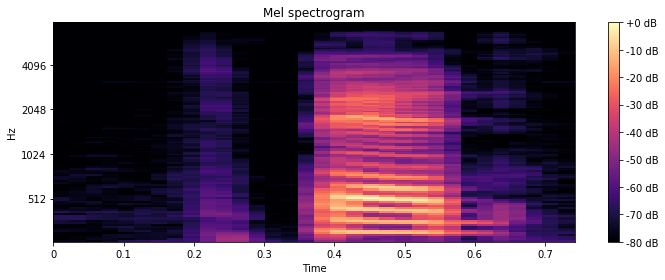

In [15]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [14]:
outcomes = ['_background_noise_', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy',
            'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 
            'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']

In [15]:
train_labels = []

for item in train:
    for outcome in outcomes:
        if item.find('\\' + outcome + '\\') >= 0:
            train_labels.append(outcome)

In [16]:
test_labels = []

for item in test:
    for outcome in outcomes:
        if item.find('\\' + outcome + '\\') >= 0:
            test_labels.append(outcome)

Some features are not a full second in length, which is causing problems down the line. Need to pad with silence.

In [87]:
#If the wav file does not have 16000 elements, we need to append some zeros to the end so that we have a consistent dataset

for i in range(len(train)):
    if len(librosa.load(train[i], sr = 16000)[0]) < 16000:
        print("Index:", i)
        tmp = soundfile.SoundFile(train[i], mode='r+', samplerate=None)
        tmp_dur = tmp.seek(0, SEEK_END)
        tmp.write(np.zeros((16000-tmp_dur, 1)))
        tmp.close()

Index: 2
Index: 10
Index: 15
Index: 17
Index: 21
Index: 28
Index: 30
Index: 47
Index: 57
Index: 72
Index: 74
Index: 95
Index: 99
Index: 108
Index: 120
Index: 130
Index: 131
Index: 142
Index: 143
Index: 156
Index: 197
Index: 200
Index: 202
Index: 216
Index: 217
Index: 219
Index: 220
Index: 221
Index: 225
Index: 226
Index: 227
Index: 234
Index: 249
Index: 250
Index: 252
Index: 262
Index: 282
Index: 283
Index: 286
Index: 291
Index: 313
Index: 326
Index: 334
Index: 335
Index: 344
Index: 346
Index: 347
Index: 350
Index: 351
Index: 362
Index: 363
Index: 364
Index: 387
Index: 388
Index: 389
Index: 397
Index: 410
Index: 411
Index: 429
Index: 440
Index: 465
Index: 466
Index: 478
Index: 484
Index: 492
Index: 497
Index: 499
Index: 500
Index: 517
Index: 533
Index: 540
Index: 558
Index: 562
Index: 598
Index: 621
Index: 636
Index: 637
Index: 638
Index: 639
Index: 654
Index: 659
Index: 660
Index: 671
Index: 673
Index: 674
Index: 687
Index: 694
Index: 695
Index: 717
Index: 727
Index: 736
Index: 737
In

Index: 5603
Index: 5608
Index: 5610
Index: 5611
Index: 5655
Index: 5688
Index: 5711
Index: 5712
Index: 5713
Index: 5731
Index: 5737
Index: 5738
Index: 5743
Index: 5744
Index: 5749
Index: 5778
Index: 5784
Index: 5831
Index: 5847
Index: 5848
Index: 5857
Index: 5858
Index: 5859
Index: 5871
Index: 5872
Index: 5879
Index: 5884
Index: 5885
Index: 5910
Index: 5942
Index: 5945
Index: 5950
Index: 5973
Index: 6002
Index: 6024
Index: 6040
Index: 6043
Index: 6049
Index: 6069
Index: 6070
Index: 6083
Index: 6087
Index: 6089
Index: 6090
Index: 6106
Index: 6113
Index: 6121
Index: 6133
Index: 6144
Index: 6187
Index: 6208
Index: 6209
Index: 6218
Index: 6219
Index: 6220
Index: 6221
Index: 6222
Index: 6223
Index: 6234
Index: 6256
Index: 6258
Index: 6262
Index: 6267
Index: 6288
Index: 6305
Index: 6306
Index: 6340
Index: 6341
Index: 6361
Index: 6375
Index: 6391
Index: 6414
Index: 6415
Index: 6438
Index: 6439
Index: 6440
Index: 6457
Index: 6462
Index: 6465
Index: 6487
Index: 6488
Index: 6489
Index: 6490
Inde

Index: 12677
Index: 12679
Index: 12680
Index: 12681
Index: 12682
Index: 12694
Index: 12726
Index: 12736
Index: 12742
Index: 12744
Index: 12755
Index: 12757
Index: 12773
Index: 12779
Index: 12796
Index: 12797
Index: 12808
Index: 12837
Index: 12848
Index: 12850
Index: 12851
Index: 12855
Index: 12856
Index: 12865
Index: 12903
Index: 12904
Index: 12923
Index: 12924
Index: 12941
Index: 12943
Index: 12960
Index: 12990
Index: 12991
Index: 12992
Index: 13038
Index: 13053
Index: 13055
Index: 13062
Index: 13065
Index: 13066
Index: 13075
Index: 13079
Index: 13081
Index: 13084
Index: 13100
Index: 13108
Index: 13109
Index: 13115
Index: 13136
Index: 13137
Index: 13138
Index: 13148
Index: 13149
Index: 13172
Index: 13173
Index: 13179
Index: 13180
Index: 13181
Index: 13182
Index: 13184
Index: 13204
Index: 13208
Index: 13209
Index: 13210
Index: 13211
Index: 13212
Index: 13234
Index: 13242
Index: 13243
Index: 13249
Index: 13252
Index: 13253
Index: 13255
Index: 13262
Index: 13263
Index: 13269
Index: 13270

Index: 18581
Index: 18582
Index: 18587
Index: 18595
Index: 18623
Index: 18624
Index: 18641
Index: 18642
Index: 18648
Index: 18679
Index: 18680
Index: 18681
Index: 18682
Index: 18693
Index: 18704
Index: 18720
Index: 18754
Index: 18760
Index: 18783
Index: 18797
Index: 18807
Index: 18808
Index: 18828
Index: 18880
Index: 18911
Index: 18923
Index: 18975
Index: 18976
Index: 18983
Index: 18985
Index: 19014
Index: 19015
Index: 19016
Index: 19017
Index: 19036
Index: 19045
Index: 19048
Index: 19049
Index: 19066
Index: 19083
Index: 19090
Index: 19096
Index: 19123
Index: 19144
Index: 19148
Index: 19150
Index: 19153
Index: 19154
Index: 19155
Index: 19156
Index: 19157
Index: 19160
Index: 19179
Index: 19180
Index: 19197
Index: 19205
Index: 19206
Index: 19208
Index: 19209
Index: 19210
Index: 19222
Index: 19223
Index: 19231
Index: 19264
Index: 19291
Index: 19308
Index: 19348
Index: 19388
Index: 19402
Index: 19416
Index: 19437
Index: 19438
Index: 19447
Index: 19455
Index: 19456
Index: 19477
Index: 19479

Index: 24867
Index: 24868
Index: 24886
Index: 24901
Index: 24996
Index: 24997
Index: 25010
Index: 25074
Index: 25075
Index: 25078
Index: 25080
Index: 25083
Index: 25093
Index: 25094
Index: 25111
Index: 25112
Index: 25113
Index: 25141
Index: 25144
Index: 25177
Index: 25181
Index: 25183
Index: 25191
Index: 25199
Index: 25224
Index: 25231
Index: 25253
Index: 25254
Index: 25257
Index: 25259
Index: 25269
Index: 25270
Index: 25273
Index: 25287
Index: 25358
Index: 25359
Index: 25360
Index: 25392
Index: 25395
Index: 25400
Index: 25419
Index: 25421
Index: 25434
Index: 25437
Index: 25438
Index: 25469
Index: 25482
Index: 25483
Index: 25502
Index: 25503
Index: 25504
Index: 25506
Index: 25528
Index: 25529
Index: 25530
Index: 25531
Index: 25544
Index: 25555
Index: 25584
Index: 25587
Index: 25601
Index: 25602
Index: 25604
Index: 25633
Index: 25634
Index: 25684
Index: 25685
Index: 25687
Index: 25698
Index: 25733
Index: 25734
Index: 25761
Index: 25778
Index: 25811
Index: 25812
Index: 25813
Index: 25821

Index: 30914
Index: 30928
Index: 30969
Index: 31006
Index: 31013
Index: 31014
Index: 31032
Index: 31056
Index: 31071
Index: 31077
Index: 31081
Index: 31086
Index: 31102
Index: 31104
Index: 31105
Index: 31107
Index: 31108
Index: 31109
Index: 31114
Index: 31122
Index: 31155
Index: 31179
Index: 31207
Index: 31212
Index: 31213
Index: 31253
Index: 31273
Index: 31289
Index: 31290
Index: 31304
Index: 31306
Index: 31332
Index: 31344
Index: 31345
Index: 31348
Index: 31349
Index: 31367
Index: 31395
Index: 31450
Index: 31451
Index: 31461
Index: 31476
Index: 31477
Index: 31486
Index: 31487
Index: 31492
Index: 31496
Index: 31506
Index: 31549
Index: 31554
Index: 31567
Index: 31570
Index: 31578
Index: 31582
Index: 31583
Index: 31600
Index: 31604
Index: 31638
Index: 31649
Index: 31656
Index: 31662
Index: 31663
Index: 31670
Index: 31677
Index: 31678
Index: 31681
Index: 31688
Index: 31689
Index: 31691
Index: 31692
Index: 31733
Index: 31739
Index: 31740
Index: 31744
Index: 31747
Index: 31750
Index: 31752

Index: 38226
Index: 38232
Index: 38233
Index: 38238
Index: 38239
Index: 38265
Index: 38276
Index: 38277
Index: 38278
Index: 38305
Index: 38354
Index: 38374
Index: 38377
Index: 38387
Index: 38406
Index: 38412
Index: 38414
Index: 38426
Index: 38493
Index: 38504
Index: 38521
Index: 38571
Index: 38578
Index: 38598
Index: 38605
Index: 38606
Index: 38621
Index: 38638
Index: 38660
Index: 38661
Index: 38666
Index: 38674
Index: 38683
Index: 38684
Index: 38692
Index: 38693
Index: 38694
Index: 38695
Index: 38706
Index: 38707
Index: 38726
Index: 38728
Index: 38730
Index: 38731
Index: 38752
Index: 38770
Index: 38773
Index: 38791
Index: 38792
Index: 38793
Index: 38800
Index: 38801
Index: 38802
Index: 38813
Index: 38839
Index: 38840
Index: 38868
Index: 38879
Index: 38880
Index: 38881
Index: 38909
Index: 38921
Index: 38940
Index: 38941
Index: 38946
Index: 38956
Index: 38977
Index: 38985
Index: 39032
Index: 39045
Index: 39049
Index: 39053
Index: 39054
Index: 39056
Index: 39068
Index: 39073
Index: 39078

Index: 44440
Index: 44444
Index: 44445
Index: 44465
Index: 44466
Index: 44470
Index: 44509
Index: 44513
Index: 44536
Index: 44556
Index: 44566
Index: 44567
Index: 44568
Index: 44575
Index: 44609
Index: 44613
Index: 44614
Index: 44615
Index: 44619
Index: 44623
Index: 44629
Index: 44638
Index: 44639
Index: 44642
Index: 44643
Index: 44648
Index: 44649
Index: 44650
Index: 44670
Index: 44672
Index: 44683
Index: 44685
Index: 44696
Index: 44704
Index: 44708
Index: 44709
Index: 44720
Index: 44724
Index: 44728
Index: 44732
Index: 44737
Index: 44740
Index: 44767
Index: 44768
Index: 44769
Index: 44770
Index: 44797
Index: 44800
Index: 44823
Index: 44824
Index: 44846
Index: 44847
Index: 44849
Index: 44921
Index: 44950
Index: 44959
Index: 44962
Index: 44963
Index: 44967
Index: 44987
Index: 44988
Index: 44996
Index: 44997
Index: 45011
Index: 45017
Index: 45038
Index: 45039
Index: 45047
Index: 45049
Index: 45061
Index: 45062
Index: 45063
Index: 45101
Index: 45104
Index: 45107
Index: 45108
Index: 45130

Index: 50433
Index: 50437
Index: 50449
Index: 50450
Index: 50476
Index: 50479
Index: 50491
Index: 50504
Index: 50505
Index: 50524
Index: 50595
Index: 50659
Index: 50674
Index: 50684
Index: 50689
Index: 50706
Index: 50707
Index: 50737
Index: 50744
Index: 50752
Index: 50761
Index: 50762
Index: 50776
Index: 50790
Index: 50794
Index: 50795
Index: 50817
Index: 50835
Index: 50841
Index: 50842
Index: 50846
Index: 50875
Index: 50879
Index: 50881
Index: 50882
Index: 50883
Index: 50889
Index: 50892
Index: 50919
Index: 50920
Index: 50927
Index: 50931
Index: 50939
Index: 50954
Index: 50987
Index: 51010
Index: 51025
Index: 51063
Index: 51078


Some samples are also longer than 1 second in length (all of the background noise files). Let's remove them from our training set for the time being. Will add them back later.

In [89]:
for i in range(len(train)):
    if len(librosa.load(train[i], sr = 16000)[0]) > 16000:
        print("Index:", i)
        #tmp = soundfile.SoundFile(train[i], mode='r+', samplerate=None)
        #tmp_dur = tmp.seek(0, SEEK_END)
        #tmp.write(np.zeros((16000-tmp_dur, 1)))

Index: 51088
Index: 51089
Index: 51090
Index: 51091
Index: 51092
Index: 51093


In [90]:
train[51088]

'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\doing_the_dishes.wav'

In [19]:
#For now, let's drop the background noise stuff from the training set (since it is not in the test set)

train.remove(train[51093])
train.remove(train[51092])
train.remove(train[51091])
train.remove(train[51090])
train.remove(train[51089])
train.remove(train[51088])

In [20]:
train_labels.remove(train_labels[51093])
train_labels.remove(train_labels[51092])
train_labels.remove(train_labels[51091])
train_labels.remove(train_labels[51090])
train_labels.remove(train_labels[51089])
train_labels.remove(train_labels[51088])

In [17]:
#Now create features for the train set

features_1 = []

for i in range(len(train)):
    features_1.append(librosa.load(train[i], sr = 16000)[0])

Because the human ear is more sensitive to some frequencies than others, it's been traditional in speech recognition to do further processing to this representation to turn it into a set of Mel-Frequency Cepstral Coefficients, or MFCCs for short. This is also a two-dimensional, one-channel representation so it can be treated like an image too.

In [22]:
mfcc2 = np.zeros((len(train), 13, 32))
for i in range(len(train)):
    mfcc2[i] = librosa.feature.mfcc(features_1[i], sr=16000, n_mfcc=13)

In [129]:
#Pad test files with zeros also, if they are < 1 second long

for i in range(len(test)):
    if len(librosa.load(test[i], sr = 16000)[0]) < 16000:
        print("Index:", i)
        tmp = soundfile.SoundFile(test[i], mode='r+', samplerate=None)
        tmp_dur = tmp.seek(0, SEEK_END)
        tmp.write(np.zeros((16000-tmp_dur, 1)))
        tmp.close()

Index: 14
Index: 25
Index: 26
Index: 27
Index: 46
Index: 77
Index: 83
Index: 92
Index: 109
Index: 110
Index: 156
Index: 163
Index: 170
Index: 171
Index: 190
Index: 199
Index: 205
Index: 206
Index: 208
Index: 209
Index: 218
Index: 220
Index: 225
Index: 226
Index: 228
Index: 233
Index: 250
Index: 253
Index: 258
Index: 259
Index: 266
Index: 267
Index: 270
Index: 278
Index: 329
Index: 330
Index: 353
Index: 374
Index: 375
Index: 383
Index: 385
Index: 388
Index: 405
Index: 420
Index: 424
Index: 429
Index: 430
Index: 435
Index: 436
Index: 440
Index: 457
Index: 476
Index: 477
Index: 495
Index: 517
Index: 518
Index: 522
Index: 530
Index: 551
Index: 560
Index: 561
Index: 567
Index: 579
Index: 580
Index: 582
Index: 625
Index: 628
Index: 629
Index: 630
Index: 652
Index: 654
Index: 696
Index: 701
Index: 702
Index: 703
Index: 707
Index: 708
Index: 724
Index: 726
Index: 735
Index: 736
Index: 750
Index: 805
Index: 813
Index: 815
Index: 839
Index: 949
Index: 950
Index: 960
Index: 961
Index: 983
Index: 

In [135]:
#Create features_2 with the properly sized dataset (test files are fixed now)

features_2 = []

for i in range(len(test)):
    features_2.append(librosa.load(test[i], sr = 16000)[0])

In [24]:
mfcc2_test = np.zeros((len(test), 13, 32))
for i in range(len(test)):
    mfcc2_test[i] = librosa.feature.mfcc(features_2[i], sr=16000, n_mfcc=13)

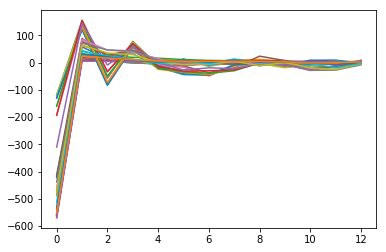

In [119]:
#Let's create some visualizations

plt.plot(mfcc2[0])
plt.show()

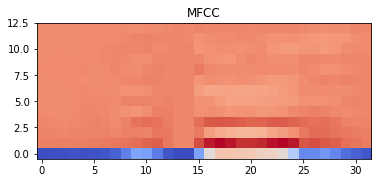

In [508]:
fig, ax = plt.subplots()
cax = ax.imshow(mfcc2[0], interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()

In [25]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

At this stage, normalize the test and train data to prepare for model construction and fitting.

In [152]:
# input image dimensions, from our data
img_rows, img_cols = 13, 32
num_classes = 30

# the data, shuffled and split between train and test sets
(x_train, y_train) = (mfcc2, train_labels)
(x_test, y_test) = (mfcc2_test, test_labels)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_norm = []
for clip in x_train:
    x_train_norm.append(stats.zscore(clip))

x_train_norm = np.asarray(x_train_norm)
    
x_test_norm = []
for clip in x_test:
    x_test_norm.append(stats.zscore(clip))

x_test_norm = np.asarray(x_test_norm)
    
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train_norm.shape[0], 'train samples')
print(x_test_norm.shape[0], 'test samples')

x_train shape: (51088, 13, 32, 1)
51088 train samples
6835 test samples


In [167]:
labels_num = dict()
for i, label in enumerate(set(train_labels)):
    labels_num.update({label: i+1})

In [168]:
labels_num

{'bed': 12,
 'bird': 22,
 'cat': 25,
 'dog': 10,
 'down': 3,
 'eight': 9,
 'five': 27,
 'four': 29,
 'go': 21,
 'happy': 16,
 'house': 14,
 'left': 18,
 'marvin': 11,
 'nine': 19,
 'no': 7,
 'off': 13,
 'on': 4,
 'one': 15,
 'right': 23,
 'seven': 30,
 'sheila': 5,
 'six': 2,
 'stop': 20,
 'three': 1,
 'tree': 17,
 'two': 24,
 'up': 28,
 'wow': 26,
 'yes': 8,
 'zero': 6}

In [171]:
train_labels2 = [labels_num.get(train_labels[i]) for i in range(len(train_labels))]

In [173]:
test_labels2 = [labels_num.get(test_labels[i]) for i in range(len(test_labels))]

In [222]:
y_train = np.asarray(train_labels2)
y_test = np.asarray(test_labels2)


# convert class vectors to binary class matrices
y_train = np.asarray(pd.get_dummies(y_train))
y_test = np.asarray(pd.get_dummies(y_test))

In [223]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_norm, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test_norm, y_test))
score = model.evaluate(x_test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 51088 samples, validate on 6835 samples
Epoch 1/10
51088/51088 [==============================] - 171s - loss: 2.4979 - acc: 0.2781 - val_loss: 1.7535 - val_acc: 0.5302
Epoch 2/10
51088/51088 [==============================] - 169s - loss: 1.7643 - acc: 0.4787 - val_loss: 1.3879 - val_acc: 0.6082
Epoch 3/10
51088/51088 [==============================] - 180s - loss: 1.5059 - acc: 0.5532 - val_loss: 1.2204 - val_acc: 0.6588
Epoch 4/10
51088/51088 [==============================] - 182s - loss: 1.3524 - acc: 0.5983 - val_loss: 1.0843 - val_acc: 0.6995
Epoch 5/10
51088/51088 [==============================] - 175s - loss: 1.2370 - acc: 0.6305 - val_loss: 1.0219 - val_acc: 0.7175
Epoch 6/10
51088/51088 [==============================] - 174s - loss: 1.1401 - acc: 0.6602 - val_loss: 0.9271 - val_acc: 0.7350
Epoch 7/10
51088/51088 [==============================] - 183s - loss: 1.0593 - acc: 0.6853 - val_loss: 0.8647 - val_acc: 0.7560
Epoch 8/10
51088/51088 [========================

The model we built on the 30 classes is already 78% accurate.

In [236]:
from collections import Counter
Counter(train_labels).values() # counts the elements' frequency

dict_values([1340, 1411, 1399, 1396, 1842, 1852, 1844, 1839, 1861, 1373, 1427, 1839, 1424, 1875, 1853, 1839, 1864, 1892, 1852, 1875, 1372, 1863, 1885, 1841, 1374, 1873, 1843, 1414, 1860, 1866])

In [39]:
#Now let's add the background noise to the mix

#Walk through all background noise audio files 
bg_root = r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\train\audio\_background_noise_'
bg_train = []

for subdir, dirs, files in os.walk(bg_root):
    for file in files:
        bg_train.append(os.path.normpath(os.path.join(subdir, file)))

In [40]:
#Remove read-me file
bg_train.remove(bg_train[4])

In [41]:
bg_train

['C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\doing_the_dishes.wav',
 'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\dude_miaowing.wav',
 'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\exercise_bike.wav',
 'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\pink_noise.wav',
 'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\running_tap.wav',
 'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\white_noise.wav']

In [258]:
#Create 1-second clips of silence from background noise files

from pydub import AudioSegment
from pydub.utils import make_chunks

i = 0
for bg in bg_train:

    myaudio = AudioSegment.from_file(bg, "wav") 
    chunk_length_ms = 1000 # pydub calculates in millisec
    chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

    #Export all of the individual chunks as wav files

    for chunk in chunks:
        chunk_name = "chunk{0}.wav".format(i)
        print("exporting", chunk_name)
        chunk.export(chunk_name, format="wav")
        i += 1

exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav
exporting chunk6.wav
exporting chunk7.wav
exporting chunk8.wav
exporting chunk9.wav
exporting chunk10.wav
exporting chunk11.wav
exporting chunk12.wav
exporting chunk13.wav
exporting chunk14.wav
exporting chunk15.wav
exporting chunk16.wav
exporting chunk17.wav
exporting chunk18.wav
exporting chunk19.wav
exporting chunk20.wav
exporting chunk21.wav
exporting chunk22.wav
exporting chunk23.wav
exporting chunk24.wav
exporting chunk25.wav
exporting chunk26.wav
exporting chunk27.wav
exporting chunk28.wav
exporting chunk29.wav
exporting chunk30.wav
exporting chunk31.wav
exporting chunk32.wav
exporting chunk33.wav
exporting chunk34.wav
exporting chunk35.wav
exporting chunk36.wav
exporting chunk37.wav
exporting chunk38.wav
exporting chunk39.wav
exporting chunk40.wav
exporting chunk41.wav
exporting chunk42.wav
exporting chunk43.wav
exporting chunk44.wav
exporting chunk45.wa

exporting chunk369.wav
exporting chunk370.wav
exporting chunk371.wav
exporting chunk372.wav
exporting chunk373.wav
exporting chunk374.wav
exporting chunk375.wav
exporting chunk376.wav
exporting chunk377.wav
exporting chunk378.wav
exporting chunk379.wav
exporting chunk380.wav
exporting chunk381.wav
exporting chunk382.wav
exporting chunk383.wav
exporting chunk384.wav
exporting chunk385.wav
exporting chunk386.wav
exporting chunk387.wav
exporting chunk388.wav
exporting chunk389.wav
exporting chunk390.wav
exporting chunk391.wav
exporting chunk392.wav
exporting chunk393.wav
exporting chunk394.wav
exporting chunk395.wav
exporting chunk396.wav
exporting chunk397.wav
exporting chunk398.wav
exporting chunk399.wav
exporting chunk400.wav
exporting chunk401.wav


In [33]:
#Manually examined chunk files and deleted all that were not a full second long (32kb)

#Walk through all chunk background noise audio files 
bg_root = r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\train\background_noise_created_by_rm'
bg_chunks = []

for subdir, dirs, files in os.walk(bg_root):
    for file in files:
        bg_chunks.append(os.path.normpath(os.path.join(subdir, file)))

In [34]:
bg_chunks[0]

'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\background_noise_created_by_rm\\chunk0.wav'

In [35]:
#Identify all sample rates
sample_rates = []
for file in bg_chunks:
    sample_rates.append(scipy.io.wavfile.read(file)[0])
print(set(sample_rates))

{16000}


In [37]:
#Create feature-set for background noise chunks 
features_3 = []

for i in range(len(bg_chunks)):
    features_3.append(librosa.load(bg_chunks[i], sr = 16000)[0])

In [42]:
bg_train[0]

'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\train\\audio\\_background_noise_\\doing_the_dishes.wav'

In [51]:
#Combine the training features we used for the model above with the background noise training features
features_4 = features_1 + features_3

Create MFCC features for the full training set + our background noise samples we just created.

In [62]:
mfcc3 = np.zeros((len(train) + len(features_3), 13, 32))
for i in range(len(features_4)):
    mfcc3[i] = librosa.feature.mfcc(features_4[i], sr=16000, n_mfcc=13)

In [53]:
train_bg_labels = ['background' for i in range(len(features_3))]

In [54]:
print(len(train_labels))
train_labels.extend(train_bg_labels)
print(len(train_labels))
print(len(train_bg_labels))

51088
51486
398


In [ ]:
#For the Kaggle competition, we need to predict:
#yes, no, up, down, left, right, on, off, stop, go. Everything else should be considered either unknown or silence

In [55]:
final_train_labels = []
targets = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'background']
for item in train_labels:
    if item in targets:
        final_train_labels.append(item)
    else:
        final_train_labels.append('unknown')

In [56]:
labels_num = dict()
for i, label in enumerate(set(final_train_labels)):
    labels_num.update({label: i+1})

In [57]:
final_test_labels = []
targets = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'background']
for item in test_labels:
    if item in targets:
        final_test_labels.append(item)
    else:
        final_test_labels.append('unknown')

In [68]:
labels_num

{'background': 5,
 'down': 4,
 'go': 1,
 'left': 7,
 'no': 6,
 'off': 12,
 'on': 8,
 'right': 3,
 'stop': 9,
 'unknown': 10,
 'up': 11,
 'yes': 2}

In [58]:
train_labels3 = [labels_num.get(final_train_labels[i]) for i in range(len(final_train_labels))]
test_labels3 = [labels_num.get(final_test_labels[i]) for i in range(len(final_test_labels))]
y_train = np.asarray(train_labels3)
y_test = np.asarray(test_labels3)

In [59]:
Counter(train_labels3).values()

dict_values([32550, 1842, 1861, 1839, 1853, 1839, 1864, 1852, 1885, 1843, 1860, 398])

In [60]:
Counter(test_labels3).values()

dict_values([4268, 253, 251, 267, 252, 262, 246, 259, 249, 272, 256])

In [69]:
x_train = mfcc3
x_test = mfcc2_test

y_train = np.asarray(train_labels3)
y_test = np.asarray(test_labels3)

y_train = np.asarray(pd.get_dummies(y_train))
y_test = np.asarray(pd.get_dummies(y_test))

In [70]:
#We need to give y_test a dimension to account for background noise (as of now, it is not in the test set...)
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [67]:
y_test.shape

(6835, 11)

In [71]:
#Move the 'background noise' aka column 5 aka index 4 to the end of the y_train array. Then create an empty column for the
#y-test array and put it at the end

y_train2 = np.concatenate((y_train[:, :4], y_train[:, 5:], y_train[:, 4:5]), axis = 1)

In [72]:
#Make sure it worked
y_train2[-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [73]:
y_test_empties = np.zeros((6835, 1))

In [74]:
#Now add the empty target column associated with background noise for the test set
y_test2 = np.concatenate((y_test[:, :], y_test_empties[:, :]), axis = 1)

In [75]:
y_test2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [725]:
#Run the model again...

In [78]:
# input image dimensions, from our data
img_rows, img_cols = 13, 32
num_classes = 11



if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_norm = []
for clip in x_train:
    x_train_norm.append(stats.zscore(clip))

x_train_norm = np.asarray(x_train_norm)
    
x_test_norm = []
for clip in x_test:
    x_test_norm.append(stats.zscore(clip))

x_test_norm = np.asarray(x_test_norm)
    
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train_norm.shape[0], 'train samples')
print(x_test_norm.shape[0], 'test samples')

x_train shape: (51486, 13, 32, 1)
51486 train samples
6835 test samples


In [79]:
type(x_test)
print(len(x_test_norm))
print(len(x_train_norm))
print(len(x_train_norm) +len(x_test_norm))

6835
51486
58321


In [125]:
#There were 398 'silence' clips. Let's use 300 of them for train and 98 for test
x_train_norm_trial = x_train_norm[:-98, :]
x_test_norm_trial = np.vstack((x_test_norm, x_train_norm[-398:-300]))

y_train2_trial = y_train2[:-98, :]
y_test2_trial = np.vstack((y_test2, y_train2[-398:-300]))

print(len(x_train_norm_trial))
print(len(x_test_norm_trial))
print(len(y_train2_trial))
print(len(y_test2_trial))

51388
6933
51388
6933


In [126]:
#In order to prevent model from always predicting dominant class ('unknown'), create a weighting for loss function
weights = dict()
tot = np.sum(y_train2_trial)
for col in range(y_train2_trial.shape[1]):
    sm = np.sum(y_train2_trial[:, col])
    weights.update({col : 1/(sm/tot)})

In [127]:
weights

{0: 27.613111230521223,
 1: 27.627956989247313,
 2: 27.747300215982719,
 3: 27.897937024972855,
 4: 27.732325957906099,
 5: 27.943447525829257,
 6: 27.568669527896994,
 7: 27.261538461538461,
 8: 1.5787403993855607,
 9: 27.882799782962561,
 10: 27.943447525829257,
 11: 171.29333333333335}

Let's get the files for the predictions loaded.

In [27]:
#Set root directory to location of audio files. Use os.path.normpath to handle '/' vs '\'
pred = os.path.normpath(r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\test\audio')

#Walk through all audio files and create explicit list of audio files to predict
challenge = []

for subdir, dirs, files in os.walk(pred):
    for file in files:
        challenge.append(os.path.normpath(os.path.join(subdir, file)))

In [28]:
challenge[0]

'C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Final Project\\test\\audio\\clip_000044442.wav'

In [29]:
#Load the unseen test files, so that we can ultimately create MFCC features on them
challenge_features = []

for i in range(len(challenge)):
    challenge_features.append(librosa.load(challenge[i], sr = 16000)[0])

In [769]:
#Test to see if any unseen test files are not 1 second in length

for i in range(len(challenge_features)):
    if len(challenge_features[i]) < 16000:
        print("Index:", i)
        #tmp = soundfile.SoundFile(test[i], mode='r+', samplerate=None)
        #tmp_dur = tmp.seek(0, SEEK_END)
        #tmp.write(np.zeros((16000-tmp_dur, 1)))
        #tmp.close()

In [32]:
#Generate the MFCC features for the dataset we want to test on

mfcc_pred = np.zeros((len(challenge_features), 13, 32))
for i in range(len(challenge_features)):
    mfcc_pred[i] = librosa.feature.mfcc(challenge_features[i], sr=16000, n_mfcc=13)

In [138]:
num_classes = 12

model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=input_shape,
                 activation='relu'))

model.add(keras.layers.BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(keras.layers.BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              #loss='mean_squared_error', optimizer='sgd',
              #optimizer = keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

model.fit(x_train_norm_trial, y_train2_trial,
          class_weight = weights,
          shuffle = True,
          batch_size=128,
          epochs=25,
          verbose=1,
          validation_data=(x_test_norm_trial, y_test2_trial))
score = model.evaluate(x_test_norm_trial, y_test2_trial, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

preds_7 = model.predict_classes(mfcc_pred_norm)
preds_df = pd.DataFrame(preds_7)
preds_df.to_csv(r'C:\Users\ryan\Desktop\Thinkful DS Sample Data - Main Course\Final Project\preds7.csv')

Train on 51388 samples, validate on 6933 samples
Epoch 1/25
51388/51388 [==============================] - 284s - loss: 24.1931 - acc: 0.2024 - val_loss: 3.2245 - val_acc: 0.0845
Epoch 2/25
51388/51388 [==============================] - 299s - loss: 13.0677 - acc: 0.3960 - val_loss: 1.4934 - val_acc: 0.4898
Epoch 3/25
51388/51388 [==============================] - 294s - loss: 9.4532 - acc: 0.5332 - val_loss: 1.0978 - val_acc: 0.6097
Epoch 4/25
51388/51388 [==============================] - 282s - loss: 7.5679 - acc: 0.6112 - val_loss: 0.9513 - val_acc: 0.6654
Epoch 5/25
51388/51388 [==============================] - 313s - loss: 6.5438 - acc: 0.6631 - val_loss: 0.8879 - val_acc: 0.6959
Epoch 6/25
51388/51388 [==============================] - 296s - loss: 5.8856 - acc: 0.7033 - val_loss: 0.8185 - val_acc: 0.7235
Epoch 7/25
51388/51388 [==============================] - 305s - loss: 5.2679 - acc: 0.7291 - val_loss: 0.7853 - val_acc: 0.7353
Epoch 8/25
51388/51388 [======================

75% accurate on the KAGGLE competition... not bad (31st percentile as of now). Accuracy below validation set because we're using previously unknown speakers and words that the model has not been trained on.

Background information:
http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
https://www.tensorflow.org/versions/master/tutorials/audio_recognition

Ways to improve:

1) Time Shifting

Adding in background noise is one way of distorting the training data in a realistic way to effectively increase the size of the dataset, and so increase overall accuracy, and time shifting is another. This involves a random offset in time of the training sample data, so that a small part of the start or end is cut off and the opposite section is padded with zeroes. This mimics the natural variations in starting time in the training data, and is controlled with the --time_shift_ms flag, which defaults to 100ms. Increasing this value will provide more variation, but at the risk of cutting off important parts of the audio. A related way of augmenting the data with realistic distortions is by using time stretching and pitch scaling, but that's outside the scope of this tutorial.

2) Add more 'silence' examples to training set 

3) Background Noise

Real applications have to recognize audio even when there are other irrelevant sounds happening in the environment. To build a model that's robust to this kind of interference, we need to train against recorded audio with similar properties. The files in the Speech Commands dataset were captured on a variety of devices by users in many different environments, not in a studio, so that helps add some realism to the training. To add even more, you can mix in random segments of environmental audio to the training inputs. In the Speech Commands set there's a special folder called _background_noise_ which contains minute-long WAVE files with white noise and recordings of machinery and everyday household activity.